In [9]:
from test_beta_package import *
%matplotlib inline

In [10]:
# confirm the folder structure and load the variables
path_data_folder, path_raw_data_folder, path_process_data_folder, path_top_folder, path_info_dir, path_analysis_dir, \
path_plots_dir, path_single_pred_dir, path_multi_pred_dir = folder_structure()

In [11]:
# load the processed pickle files  
data_continous_ratemaps, data_binned_glm = \
    processing_and_loading(path_raw_data_folder, path_process_data_folder, 
                           data_continous_ratemaps_pickle="rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl",
                           data_binned_glm_pickle="binned_4_GLM_rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl")


In [12]:
# obtain the information from pickles
predictors_name_list, cells_id, animal_name = get_data_information(path_info_dir, data_continous_ratemaps)
print(predictors_name_list)

['B Speeds', 'C Body_direction', 'D Allo_head_direction', 'G Neck_elevation', 'K Ego3_Head_roll', 'L Ego3_Head_pitch', 'M Ego3_Head_azimuth', 'N Back_pitch', 'O Back_azimuth', 'P Ego2_head_roll', 'Q Ego2_head_pitch', 'R Ego2_head_azimuth', 'B Speeds_1st_der', 'C Body_direction_1st_der', 'C Body_direction_2nd_der', 'D Allo_head_direction_1st_der', 'D Allo_head_direction_2nd_der', 'G Neck_elevation_1st_der', 'G Neck_elevation_2nd_der', 'K Ego3_Head_roll_1st_der', 'K Ego3_Head_roll_2nd_der', 'L Ego3_Head_pitch_1st_der', 'L Ego3_Head_pitch_2nd_der', 'M Ego3_Head_azimuth_1st_der', 'M Ego3_Head_azimuth_2nd_der', 'N Back_pitch_1st_der', 'N Back_pitch_2nd_der', 'O Back_azimuth_1st_der', 'O Back_azimuth_2nd_der', 'P Ego2_head_roll_1st_der', 'P Ego2_head_roll_2nd_der', 'Q Ego2_head_pitch_1st_der', 'Q Ego2_head_pitch_2nd_der', 'R Ego2_head_azimuth_1st_der', 'R Ego2_head_azimuth_2nd_der']


In [13]:
# assign values to the inference parameters
dict_param = dict_parameters_hmm(path_info_dir, animal_name, num_dimen=1, num_categ_obs=2, N_iters=500,
                                 tolerance=10 ** -5, num_indep_neurons=1, num_predictors=4, max_num_states=3,
                                 observation_type="input_driven_obs",
                                 transistion_type="standard", optim_method="em")

In [14]:
cells_index, tot_time = cells_selection_manual(path_info_dir, data_continous_ratemaps, data_binned_glm, dict_param, 'cells_selection.csv')

In [15]:
glmhmms_ista, process_neur, inpts, T, tot_masked_indices, path_plots_list, dict_objects_multicov = \
   data_structure_multipredictor(path_analysis_dir, path_info_dir, path_multi_pred_dir, data_continous_ratemaps,
                            data_binned_glm, dict_param, tot_time, cells_index, best_predictors='best_predictors.csv')

        Predictors'
0          B Speeds
1  G Neck_elevation
2  K Ego3_Head_roll
3      N Back_pitch
4  B Speeds_1st_der
!Fraction missing points is 0.011952353757036795 for the model 0
!Fraction missing points is 0.011952353757036795 for the model 1


In [16]:
fit_ll_states_list, glmhmms_ista, time_states_comp = inference_section_multi_predictor(path_analysis_dir, path_info_dir, dict_param,
                                                                       glmhmms_ista=glmhmms_ista,
                                                                       process_neur=process_neur,
                                                                       inputs_list=inpts)

[[ 10.6933533    7.77147212  14.95171273  -8.5924654 ]
 [ 10.94194185   7.73293056  14.66348645  -8.6669004 ]
 [ 11.20825033   7.70454672  14.19854536  -9.21554013]
 ...
 [  1.88188967  11.14532455   4.04407274 -11.50185231]
 [  1.93495419  11.15501299   4.32910028 -11.38486502]
 [  1.97855496  11.16212476   4.67918961 -11.25687995]]


  0%|          | 0/500 [00:00<?, ?it/s]

computation time loop 0 is 84.99178719520569


  0%|          | 0/500 [00:00<?, ?it/s]

computation time loop 1 is 104.1500473022461
The total time for the inference is 189.14183449745178


In [17]:
posterior_probs_list = posterior_prob_process(path_info_dir, path_analysis_dir, dict_param=dict_param, dict_processed_objects=0, multi_predictor=0) # glmhmms_ista=glmhmms_ista, process_neur=process_neur, inputs_list=inputs_list)


the input form is [array([[ 10.6933533 ,   7.77147212,  14.95171273,  -8.5924654 ],
       [ 10.94194185,   7.73293056,  14.66348645,  -8.6669004 ],
       [ 11.20825033,   7.70454672,  14.19854536,  -9.21554013],
       ...,
       [  1.88188967,  11.14532455,   4.04407274, -11.50185231],
       [  1.93495419,  11.15501299,   4.32910028, -11.38486502],
       [  1.97855496,  11.16212476,   4.67918961, -11.25687995]])]
Total computation time for posterior probability is 0.20026755332946777


In [18]:
%%capture cap --no-stderr
# take the cumulative occupancy per state
states_occupancies = states_occupancies_computation(path_analysis_dir, dict_posterior=0)

state of occupancy is [0.14298802 0.85701198]


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\teof\\PycharmProjects\\pythonREGITglmhmm\\postural_glm_hmm\\results_folder\\plots_dir/single_pred_dir/diana_notreheaded_singlepredictor_2022-10-26_run//diana_notreheaded_states=2_max_iters=2__pred=1_obs=input_driven_obs_trans=inputdriven/states_occupancies_histogram_neur=1_max_iters=500_tolerance=1e-05_tot_pred=4_obs=input_driven_obs_trans=standard_method=em_diana_notreheaded.pdf'

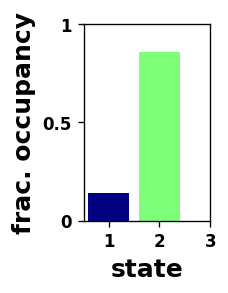

In [19]:
states_occupancies_histogram(path_analysis_dir, path_info_dir, dict_param=0, file_states_occup=0)

In [ ]:
transition_prob_matrix(path_analysis_dir, path_info_dir, dict_param=0, dict_processed_objects=0)

In [ ]:
weights_distribution_histogram(path_analysis_dir, path_info_dir, multi_predictor=0)